In [1]:
# control the GPU to use
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
# load our package
from gldm import sampleMol
import torch

/home/conghao001/miniconda3/envs/gldm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# for visualization
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True
IPythonConsole.drawOptions.baseFontSize = 0.5
IPythonConsole.ipython_useSVG=True

# Unconstrained generation

In [4]:
uncon_model_path = 'GLDM_models/GLDM_WAE_uncond.pt'
uncon_config_file = 'config/GLDM_WAE_uncond.yml'

In [5]:
uncon_mols = sampleMol(uncon_model_path, uncon_config_file, num_samples=10, output_file='uncon_samples.pkl')

Processing...
Done!


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 3.49 M params.
Running DDIM Sampling with 500 timesteps


DDIM Sampler: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:39<00:00, 12.81it/s]


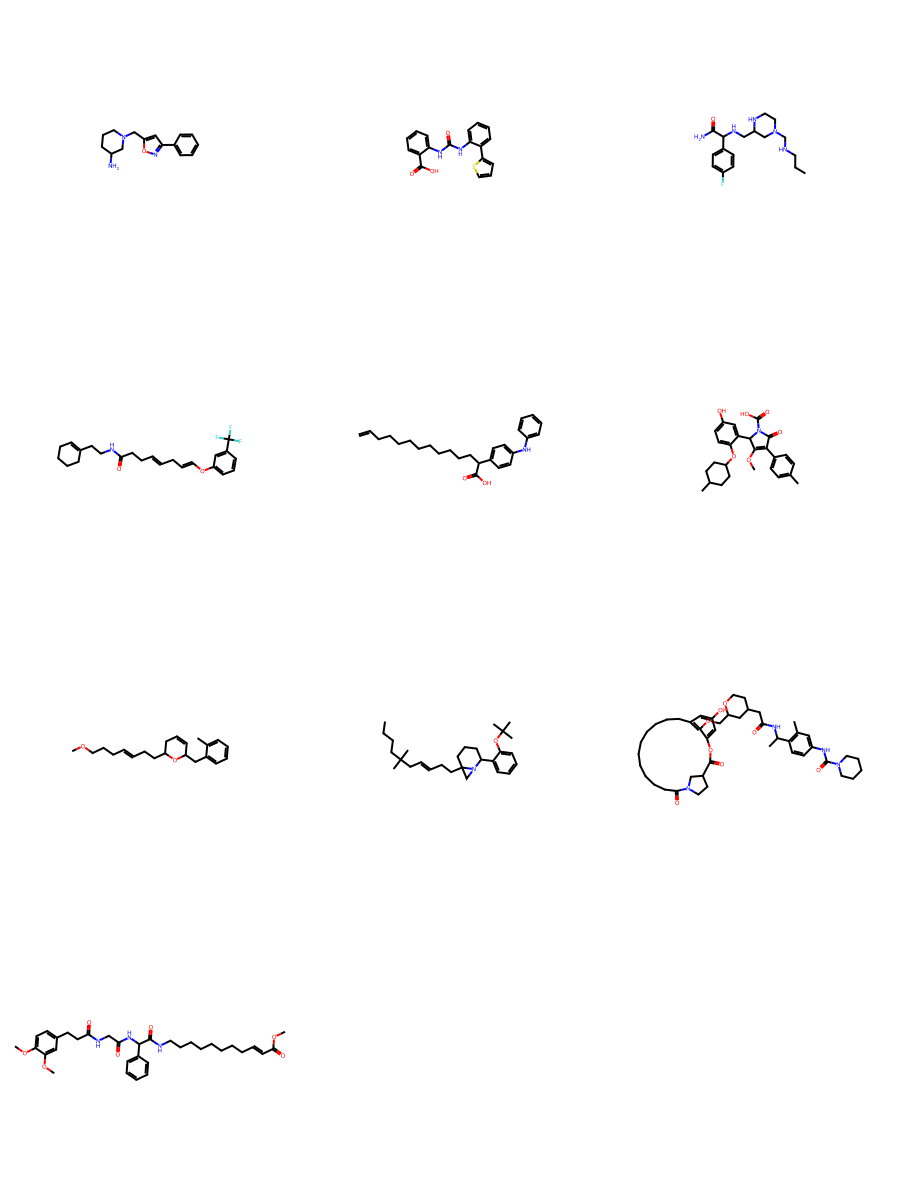

In [6]:
Draw.MolsToGridImage(uncon_mols, subImgSize=(300,300), maxMols = 1000, molsPerRow=3, useSVG=True, returnPNG=False)

# Constrained generation using pseudo gene expression profile

In [7]:
con_model_path = 'GLDM_models/GLDM_WAE_cond.pt'
con_config_file = 'config/GLDM_WAE_cond.yml'

In [8]:
dummy_gene_expr = torch.rand((10, 979))
dummy_gene_expr

tensor([[0.5088, 0.9825, 0.5826,  ..., 0.3808, 0.2987, 0.7676],
        [0.8927, 0.7447, 0.2364,  ..., 0.4793, 0.2082, 0.6906],
        [0.5439, 0.5081, 0.5914,  ..., 0.1385, 0.5509, 0.3166],
        ...,
        [0.2056, 0.9619, 0.0430,  ..., 0.3279, 0.6121, 0.9171],
        [0.3363, 0.4468, 0.3330,  ..., 0.2997, 0.5956, 0.0595],
        [0.9020, 0.4398, 0.4348,  ..., 0.1241, 0.1638, 0.4178]])

In [10]:
con_mols = sampleMol(con_model_path, con_config_file, gene_expression=dummy_gene_expr, num_samples=10, output_file='con_samples.pkl')

Processing...
Done!


LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 8.91 M params.
Running DDIM Sampling with 500 timesteps


DDIM Sampler: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:45<00:00, 10.93it/s]


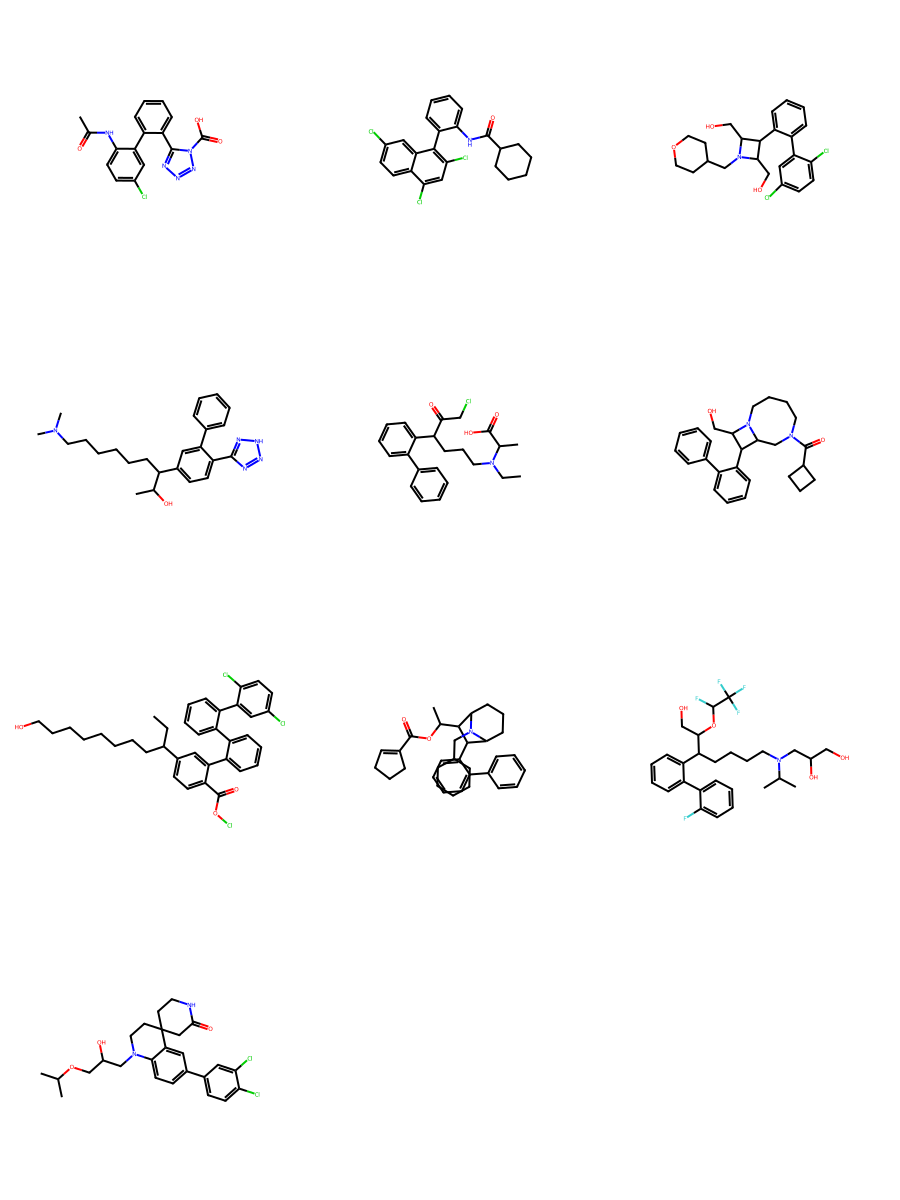

In [11]:
Draw.MolsToGridImage(con_mols, subImgSize=(300,300), maxMols = 1000, molsPerRow=3, useSVG=True, returnPNG=False)